In [1]:
import copy

import numpy as np
import matplotlib.pyplot as plt

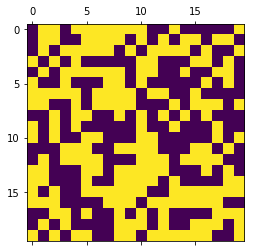

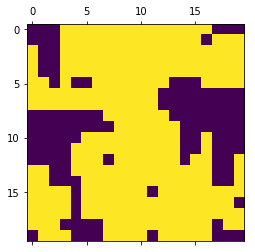

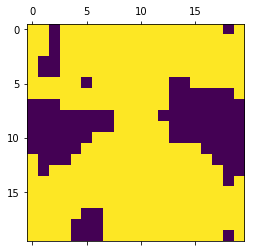

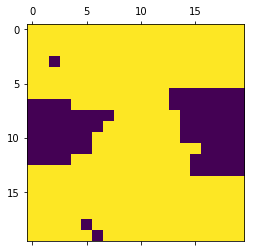

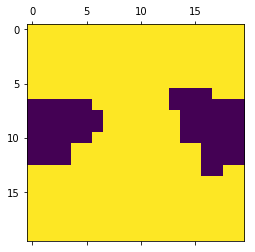

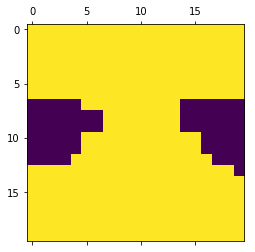

In [20]:
class Ising2D:
    def __init__(self,x = 20, y = 20, seed = 0):
        np.random.seed(seed)
        self.dimx = x
        self.dimy = y
        self.xy = np.random.choice([-1,1], x*y)
        self.xy = self.xy.reshape(x,y)
        self.E = 0
        self.h = 0
        self.J = 1
        self.neighbors = [[-1,0],[1,0],[0,-1],[0,1]]
        self.T = 1

    def main(self):
        self.MC(5000)
        
    def calcE(self,xy):
        E = 0
        for x in range(self.dimx):
            for y in range(self.dimy):
                for neighbor in self.neighbors:
                    nx = (x + neighbor[0]) % self.dimx
                    if (nx < 0):
                        nx = self.dimx
                    ny = (y + neighbor[1]) % self.dimy
                    if (ny < 0):
                        ny = self.dimy

                    E += -self.J * xy[x][y] * xy[nx][ny]
        return E
    
    def MC(self, loop):
        for i in range(loop):
            mp = np.random.randint(0, self.dimx, 2)  #ランダムな一点の座標を表すリスト
            txy = copy.deepcopy(self.xy)            #txyはスピンの分布self.xyのdeep copy
            txy[mp[0],mp[1]] = -txy[mp[0], mp[1]]   #txyのうちの一つのスピンをフリップする (deep copyのためself.xyは影響なし)
            Epre = self.calcE(self.xy)              #フリップ前後のエネルギーを計算
            Eafter = self.calcE(txy)
            if Eafter < Epre:
                self.xy = txy                       #エネルギーが下がっていれば状態を遷移する
            else:
                pro = np.random.random()            #pro は [0.0, 1.0)の一様分布からのサンプル
                if pro < np.exp(-(Eafter-Epre)/self.T):  #メトロポリス法
                    self.xy = txy
            if i % 1000 == 0 or i == (loop - 1):
                self.show(i)
    
    def show(self, index):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.matshow(self.xy)
        
        filename = "ising%05d.png" % (index)
        plt.savefig(filename)

if __name__ == "__main__":                            #importされた時に実行されない
    tmp = Ising2D()                                   #Ising2Dクラスのオブジェクトを生成
    tmp.main()                                        #メインメソッドを実行
                
            